In [1]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
from keras.datasets.mnist import load_data
# ((x_train, y_train), (x_test, y_test))
(x_train, y_train), (x_test, y_test) = load_data()

Using TensorFlow backend.


In [3]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


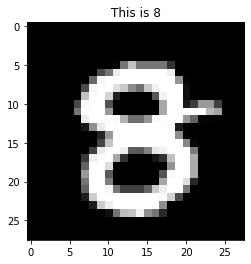

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import random
i = random.randint(0, 59999)
plt.title("This is {}".format(y_train[i]))
plt.imshow(x_train[i], cmap="gray")

In [5]:
import pandas as pd
pd.DataFrame(x_train[i])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,51,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,74,...,237,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,106,245,...,253,147,4,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,74,245,254,...,254,254,13,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,191,254,254,...,254,254,13,0,0,0,0,0,0,0


In [6]:
x_train_reshape = x_train.reshape(x_train.shape[0], -1)
x_test_reshape = x_test.reshape(x_test.shape[0], -1)
pd.DataFrame(x_train_reshape)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=30)
x_train_pca = pca.fit_transform(x_train_reshape)
x_test_pca = pca.transform(x_test_reshape)

In [8]:
pd.DataFrame(x_train_pca)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,123.932589,-312.674264,-24.514052,-555.757922,-27.296667,-232.476286,233.995786,159.799845,-363.515322,198.419984,...,30.621429,-64.002591,-220.695161,253.448166,43.843186,104.221767,-306.168701,170.962729,-130.525704,-167.953855
1,1011.718376,-294.857037,596.339563,-460.766210,-827.275218,-181.950518,-45.020710,-104.969523,40.459296,150.970234,...,210.394965,-86.214650,-1.617647,18.064250,233.025717,213.642340,13.338686,44.749263,-359.284108,-84.445319
2,-51.849608,392.173153,-188.509750,521.011348,-306.680733,-1.835349,-859.046981,368.591764,-114.546201,-178.507441,...,-62.196200,-3.214226,121.435883,-7.803705,-130.088618,85.814453,174.769167,144.328437,15.648771,-281.353056
3,-799.127037,-607.197218,273.651238,105.878234,-1.853229,699.654692,-473.712977,-67.321811,302.731096,11.113365,...,-65.819016,-123.239162,60.689027,-94.831693,129.507064,13.593928,-276.347804,142.641511,10.780014,-109.013779
4,-382.754942,730.542868,16.353748,-241.697521,98.161352,43.229736,-91.666822,-405.554882,225.501979,104.111892,...,-6.272432,-68.535408,233.239899,5.917098,-1.588180,81.495904,-186.651336,202.174455,-127.940229,64.790978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,-99.621760,-293.475562,135.940209,-347.124184,304.275922,236.993994,-498.555363,-237.614971,-494.897616,320.329888,...,-82.872525,100.196042,-349.776711,91.212812,9.850485,-27.159926,19.146840,-140.997482,-182.449990,-204.310569
59996,152.757810,-687.899701,-88.932412,-650.013837,198.407546,184.771871,-487.139612,505.333578,-668.867374,27.124996,...,-84.149079,-152.750826,-106.228643,25.184995,-35.410201,-91.553681,76.632342,-70.635934,47.228354,-65.467946
59997,-178.053450,160.078209,-257.613083,-714.650416,-210.315153,-462.462637,-464.534792,-184.822366,-87.524836,268.110575,...,-25.079282,-269.872967,-207.006981,-66.206051,-373.007022,-25.212465,-108.822423,-153.321923,-176.226465,-391.926014
59998,130.606072,-5.591936,513.858675,342.703569,-521.165816,-540.554222,-107.376516,140.728999,-16.495929,-93.843149,...,148.557240,-121.973079,-42.630665,-90.475716,147.105674,442.627454,11.431709,-278.208108,-117.429838,55.528285


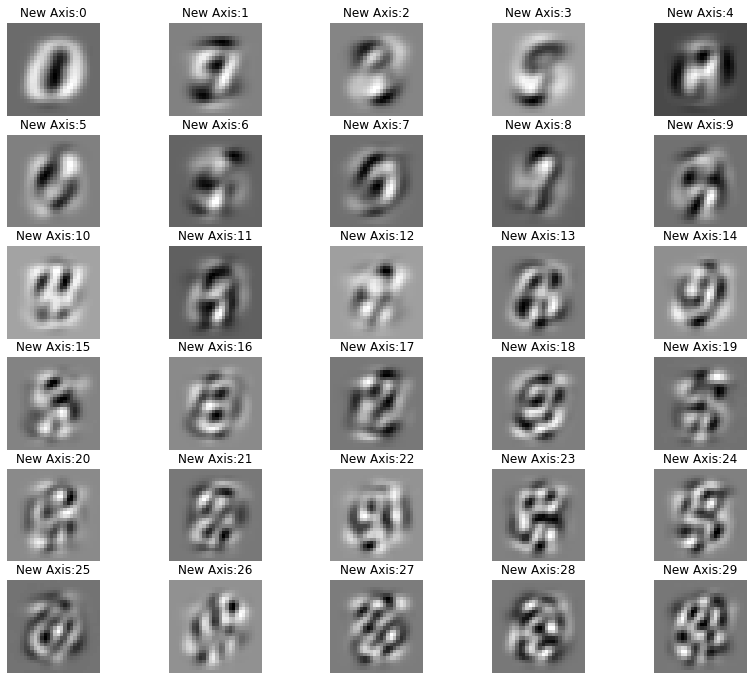

In [9]:
axis = pca.components_
width = 5
height = len(axis) // width + 1
plt.figure(figsize=(14, 14))
for i, a in enumerate(axis):
    plt.subplot(height, width, i+1)
    a_reshape = a.reshape(28, 28)
    plt.axis("off")
    plt.title("New Axis:{}".format(i))
    plt.imshow(a_reshape, cmap="gray")

In [10]:
print("每一個軸解釋了多少cov:", pca.explained_variance_ratio_)
print("SUN:", sum(pca.explained_variance_ratio_))

每一個軸解釋了多少cov: [0.09704664 0.07095924 0.06169089 0.05389419 0.04868797 0.04312231
 0.0327193  0.02883895 0.02762029 0.02357001 0.0210919  0.02022991
 0.01715818 0.01692111 0.01578641 0.01482953 0.01324561 0.01276897
 0.01187257 0.01152683 0.0106615  0.010067   0.0095355  0.00912524
 0.00883389 0.00839268 0.00812566 0.00786314 0.00744674 0.00688372]
SUN: 0.730515881544046


In [11]:
print("留下來的影響力:", pca.singular_values_)

留下來的影響力: [141291.00226882 120817.18859621 112650.9232813  105291.96728785
 100077.18497144  94183.59653123  82040.11204589  77021.8599048
  75376.92118235  69631.23337809  65869.14984398  64509.13672445
  59410.04494387  58998.19494812  56985.71128193  55231.63267474
  52198.75624863  51250.98594793  49419.29423557  48694.42382637
  46830.99627798  45506.58084406  44289.02214277  43325.77681275
  42628.51058518  41550.34909428  40884.00669905  40218.15571028
  39138.78032444  37630.1393017 ]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier()
grid = {
    "n_estimators":[25],
    "max_depth":range(10, 35, 5)
}
cv = GridSearchCV(clf, grid, cv=10, n_jobs=4)
cv.fit(x_train_pca, y_train)
print(cv.best_params_)
print(cv.best_score_)

In [ ]:
import numpy as np
clf = RandomForestClassifier(n_estimators=100, max_depth=20)
scores = cross_val_score(clf, x_train_pca, y_train , cv=10, n_jobs=4)
print(np.average(scores))

In [ ]:
from sklearn.metrics import accuracy_score
clf = RandomForestClassifier(n_estimators=100, max_depth=20)
clf.fit(x_train_pca, y_train)
pre = clf.predict(x_test_pca)
print("正確率:", accuracy_score(pre, y_test))

In [ ]:
from sklearn.metrics import confusion_matrix
i = ["{}(正確)".format(n) for n in list(range(0, 10))]
c = ["{}(預測)".format(n) for n in list(range(0, 10))]
percents = []
for r in confusion_matrix(y_test, pre):
    percents.append(["{}%".format(round(n/sum(r) * 100, 2)) for n in r])
pd.DataFrame(percents,
             index=i,
             columns=c)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

tree = DecisionTreeClassifier(max_depth=20)
tree.fit(x_train_pca, y_train)

g = export_graphviz(tree, max_depth=3, 
                    feature_names=["Axis({})".format(n) for n in range(30)],
                    class_names=[str(n) for n in range(10)],
                    filled=True)
graphviz.Source(g)

In [ ]:
# 你也可以用feature_importance看看特徵的重要性
imp = clf.feature_importances_
pd.DataFrame({
    "Axis":list(range(30)),
    "Importance":imp
})

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

scaler = MinMaxScaler()
x_train_pca_norm = scaler.fit_transform(x_train_pca)
x_test_pca_norm = scaler.transform(x_test_pca)

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train_pca_norm, y_train)
pre = knn.predict(x_test_pca_norm)
print("KNN正確率:", accuracy_score(pre, y_test))

In [ ]:
import seaborn as sns
draw = PCA(n_components=2)
x_train_draw = draw.fit_transform(x_train_reshape)
x_train_draw_norm = scaler.fit_transform(x_train_draw)
axis1 = [n[0] for n in x_train_draw_norm]
axis2 = [n[1] for n in x_train_draw_norm]
plt.figure(figsize=(14, 14))
sns.scatterplot(axis1, axis2, hue=y_train, 
                palette=sns.color_palette("hls", 10))

In [ ]:
from sklearn.manifold import TSNE
tsne_scaler = MinMaxScaler()
x_test_draw = tsne_scaler.fit_transform(x_test_reshape)
tsne = TSNE(n_components=2, n_jobs=4)
x_test_draw_tsne = tsne.fit_transform(x_test_draw)
axis1, axis2 = x_test_draw_tsne[:, 0], x_test_draw_tsne[:, 1]
plt.figure(figsize=(14, 14))
sns.scatterplot(axis1, axis2, hue=y_test, 
                palette=sns.color_palette("hls", 10))